In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data = pd.read_csv("flight/pwmx_voltage_fit.txt", header=None)

v = data.iloc[:,0]
mx = data.iloc[:,1]
my = data.iloc[:,2]
mz =  data.iloc[:,3]

four_v_index  = v[v == 3.9].index.tolist()[0] 
start = 0
end = len(data)

mx = mx/mx[four_v_index]
my = my/my[four_v_index]
mz = mz/mz[four_v_index]



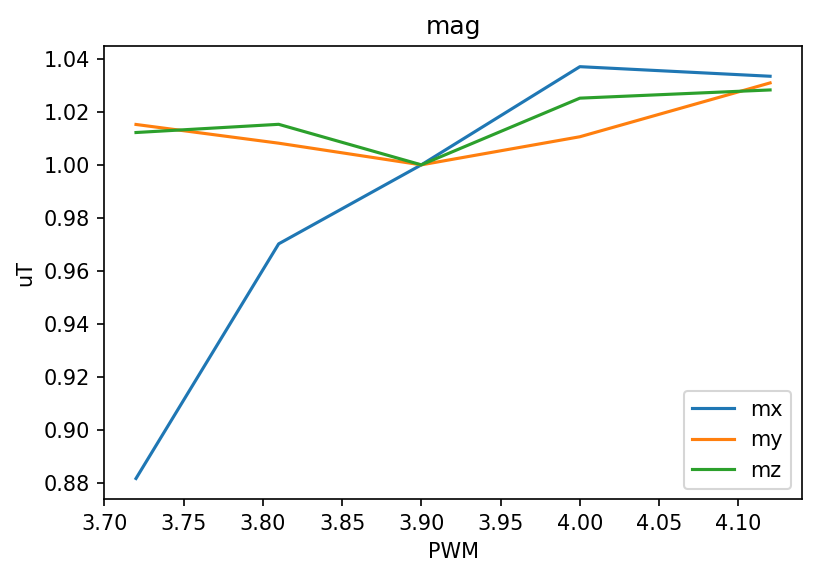

In [13]:
plt.figure(dpi=150)
plt.plot(v[start:end], mx[start:end], label = "mx")
plt.plot(v[start:end], my[start:end], label = "my")
plt.plot(v[start:end], mz[start:end], label = "mz")
plt.xlabel("PWM")
plt.ylabel("uT")
plt.title("mag")
plt.legend()
plt.show()

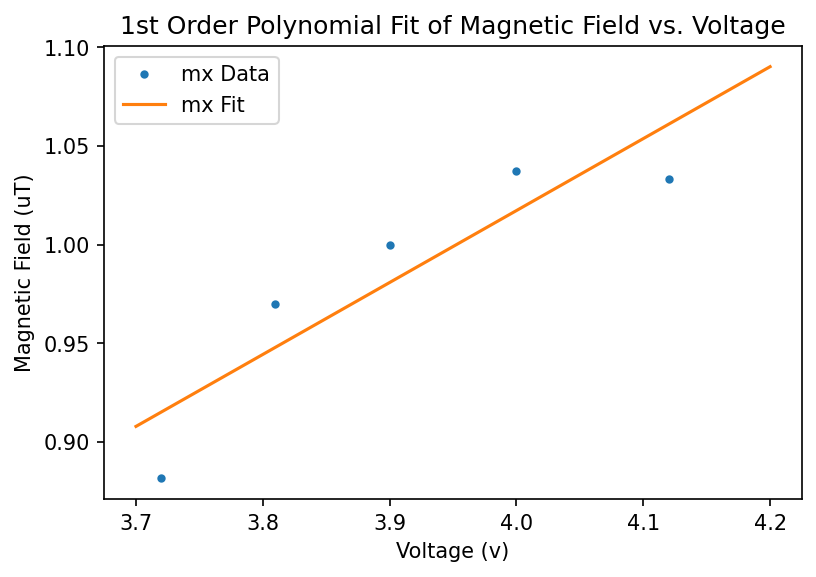

v to Magx: [ 0.36432835 -0.44007538]


In [14]:
coeffs_mx = np.polyfit(v[start:end], mx[start:end], 1)
coeffs_my = np.polyfit(v[start:end], my[start:end], 1)
coeffs_mz = np.polyfit(v[start:end], mz[start:end], 1)


# Create polynomial functions from the coefficients
poly_mx = np.poly1d(coeffs_mx)
poly_my = np.poly1d(coeffs_my)
poly_mz = np.poly1d(coeffs_mz)
# Generate a range of PWM values for plotting the fit
v_fit = np.linspace(3.7, 4.2, 500)

# Plot the original data
plt.figure(dpi=150)
plt.plot(v[start:end], mx[start:end], '.', label="mx Data")
# plt.plot(v[start:end], my[start:end], '.', label="my Data")
# plt.plot(v[start:end], mz[start:end], '.', label="mz Data")

# Plot the fitted curves
plt.plot(v_fit,poly_mx(v_fit), label="mx Fit")
# plt.plot(v_fit, poly_my(v_fit), label="my Fit")
# plt.plot(v_fit, poly_mz(v_fit), label="mz Fit")
plt.xlabel("Voltage (v)")
plt.ylabel("Magnetic Field (uT)")
plt.title("1st Order Polynomial Fit of Magnetic Field vs. Voltage")


plt.legend()
plt.show()

print("v to Magx: "+ str(coeffs_mx))
# print("v to Magy: "+ str(coeffs_my))
# print("v to Magz: "+ str(coeffs_mz))